In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset

I_scale = 10.0
dataset = Dataset(scale=I_scale)

In [3]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
21.438894
-0.016897107


In [4]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.0005 # Uの学習率

U_scale = 7.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

iteration = 10

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=0.022822727769861377 std=2.0208384279420115
rs mean=-2.6458346311270178e-17 std=1.0462373087566194e-15
us mean=0.02304424720321438 std=2.0016218949933453
rs mean=0.0010498613119125366 std=0.035344261676073074
us mean=0.02345382503744472 std=1.9841132146481393
rs mean=0.0032206003088504076 std=0.1973528265953064
us mean=0.02413529157390515 std=1.968010446155645
rs mean=0.05893922224640846 std=0.2442546784877777
us mean=0.02549687479231416 std=1.9528570650714556
rs mean=-4.499696765293715e-17 std=1.2500437061404896e-15
us mean=0.026822957954486 std=1.938635775748176
rs mean=0.008186856284737587 std=0.12458990514278412
us mean=0.03790078843946002 std=2.0807874408012457
rs mean=0.07662450522184372 std=2.345614194869995
us mean=0.06559258459612649 std=2.3171268156387175
rs mean=0.20070137083530426 std=1.5526375770568848
us mean=0.08247122881870808 std=2.4212437440699914
rs mean=-0.1009015142917633 std=1.232115626335144
us mean=0.1102044026775805 std=2.5054685042861937
rs mean=0.0564

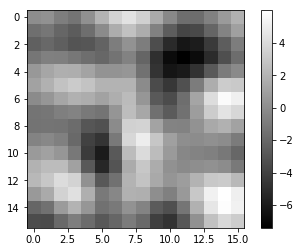

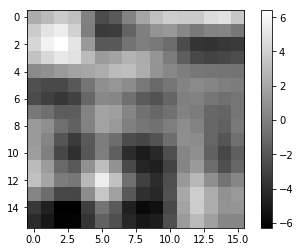

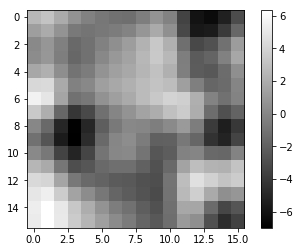

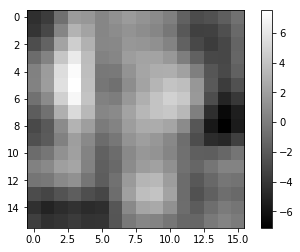

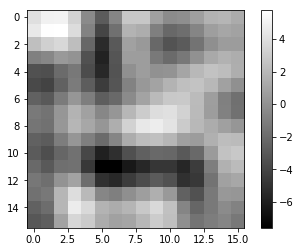

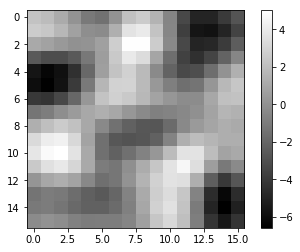

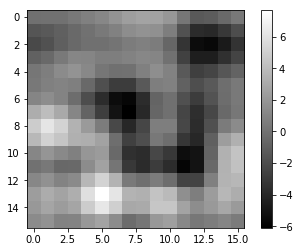

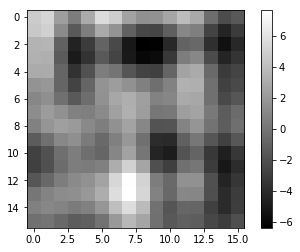

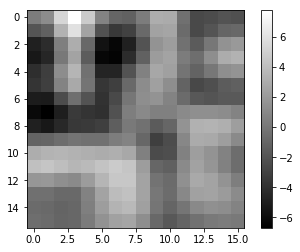

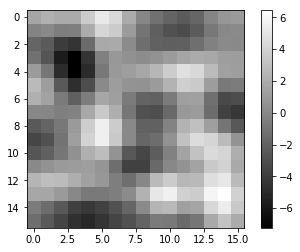

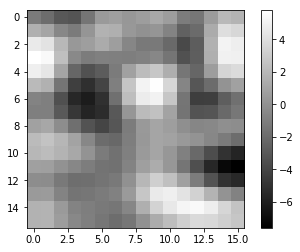

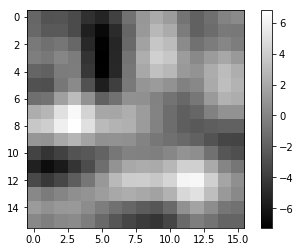

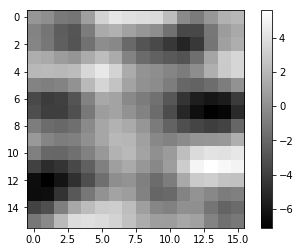

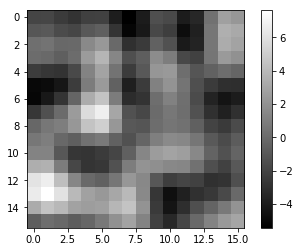

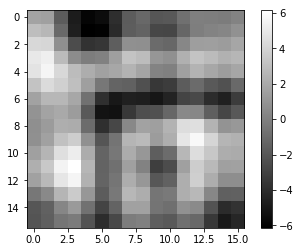

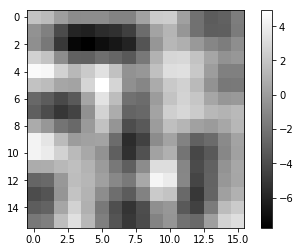

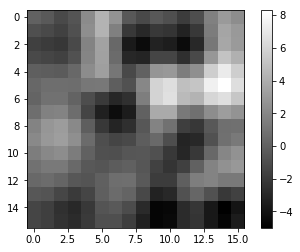

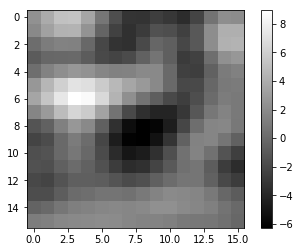

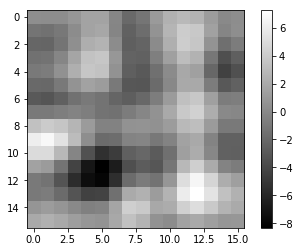

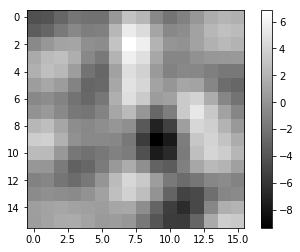

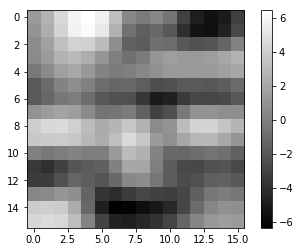

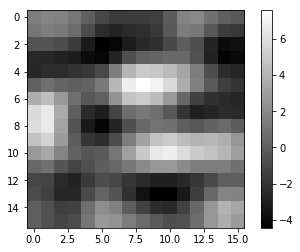

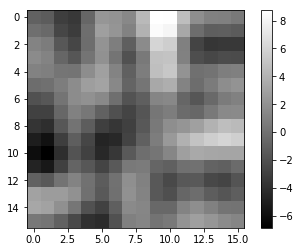

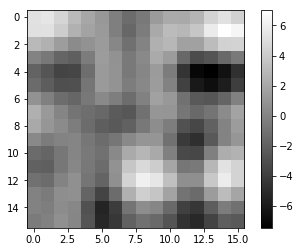

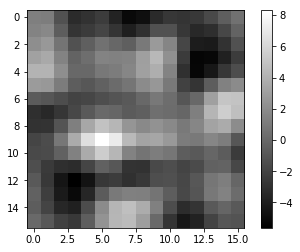

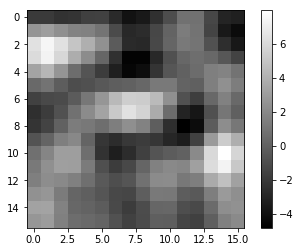

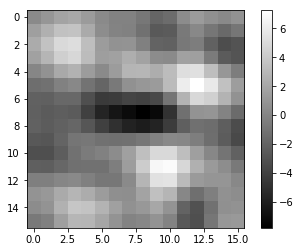

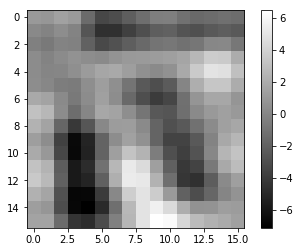

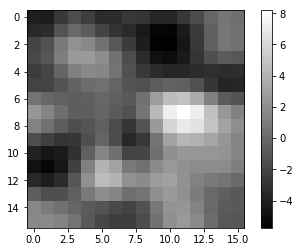

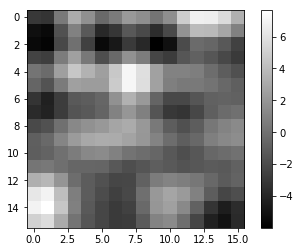

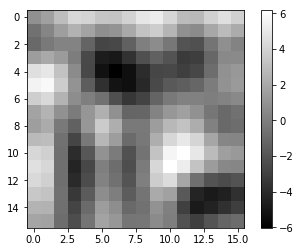

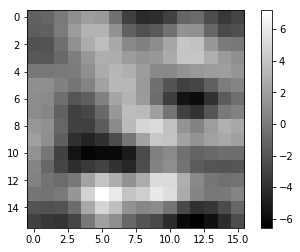

In [5]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

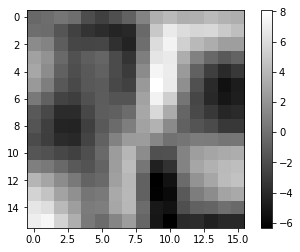

In [7]:
I = dataset.get_image(500, 0)
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[ 0.01347528 -0.07811692  0.08165766 -0.23310272  0.08438152 -0.1621728
  0.17899515  0.21903588  0.152774   -0.30972472 -0.07665302  0.05985726
  0.05214686  0.3182104   0.03453378 -0.43228093  0.33245116  0.34712467
 -0.3168076   0.22726953 -0.12390716  0.15004635  0.0924063  -0.00313349
 -0.06409921  0.09944039  0.07837495  0.18003927  0.30950004 -0.10234864
 -0.15927511  0.03507457]


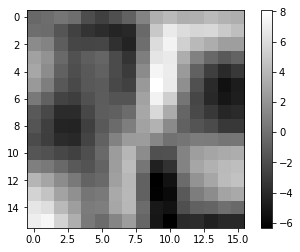

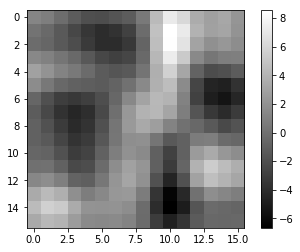

In [11]:
image_index = 500
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(2):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()